# Label Solid and Liquid phases with PCA: hard disks

Author: Weikai Qi

Email : wikaiqi@gmail.com

In this project, I will use PCA to Label 2D solid and liquid phases from configurations obtained from MD simulation data. 

## data
 There are $64*64*2$ coordinates in In each configuraiton. I normalized the data by the box size to ensure the data in the range [-0.5, 0.5].  


## 1- Load and shuffle Data

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
import gc
import time
import tensorflow as tf
from tensorflow.python.framework import ops
import math
%matplotlib inline

plt.rcParams["figure.figsize"]=(12, 10)
size = 64*64

In [6]:
def load_data(filename, size):
    '''
    Load coordinates data from file, and combine the x, y cooredates into one row
    filename   -- the file which stores the coordinates
    size       -- size of each configuration (number of particles)
    label_type -- solid/liquid 
    
    '''
    data_df   = pd.read_csv(filename, engine='c')
    n_data    = int(data_df.shape[0]/size)
    
    data_x   = np.array(data_df['x'][:]).reshape(n_data, size)  + 0.5
    data_y   = (np.array(data_df['y'][:]).reshape(n_data, size) + 0.5)*np.sqrt(3.0)/2.0
    packf    = np.array(data_df['packf'][:]).reshape(n_data,size)
    #print(packf)
    
    dataSet = np.hstack((data_x, data_y, packf))
    
    return dataSet
    

In [7]:
# Load solid/liquid training data 
trainSet = np.array(load_data("data/SaveconfigAll.dat", size))


train_x = trainSet[:, 0: 2*size].T
packf   = trainSet[:, 2*size].T

print("number of training samples : ", train_x.shape[1])
print(packf)

number of training samples :  18000
[0.1  0.1  0.1  ... 0.88 0.88 0.88]


In [8]:
def plot_rxy(data_Feature, id, size):
    rx = data_Feature[0:size, id].T
    ry = data_Feature[size:2*size, id].T
    plt.plot(rx, ry, 'bo')
    plt.axis([0, 1, 0, 1])

packing fracion is:  0.67
7000


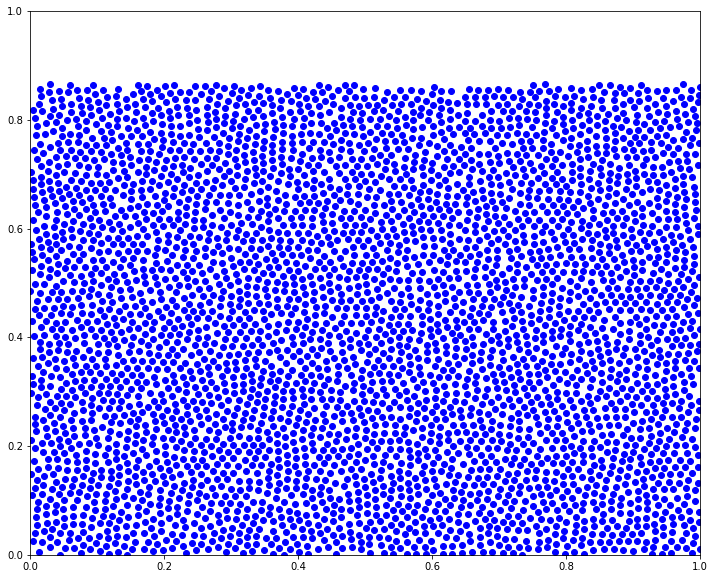

In [25]:
# plot configuration
id = 7000
plot_rxy(train_x, id, size)
print("packing fracion is: ",packf[id])
print(id)


In [10]:
data = train_x[0:size].T
print(data.shape[0],data.shape[1])

18000 4096


In [19]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(data) 
#print(pca.explained_variance_ratio_) 
#print(pca.explained_variance_) 

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
lambdaall = pca.explained_variance_ratio_
nlambda = lambdaall.shape[0]

print(nlambda)

np.savetxt(r'PCAres/lambdaall.txt', lambdaall, fmt='%.8f')

873


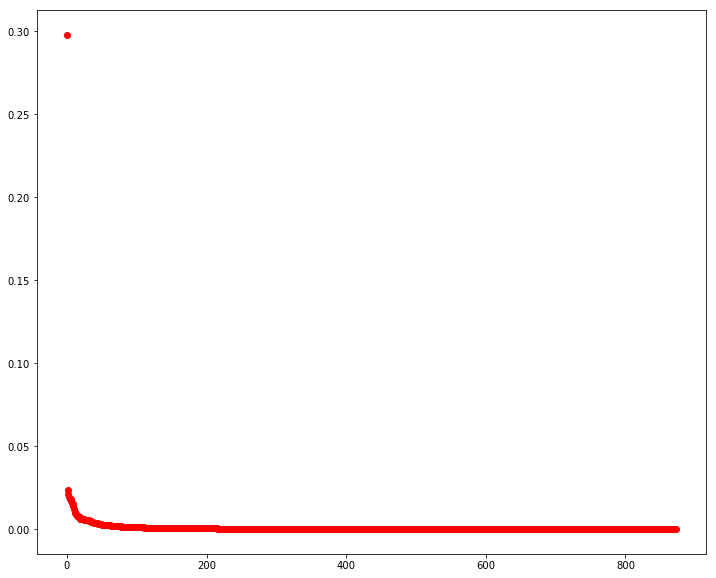

In [21]:
plt.plot(lambdaall,'ro')

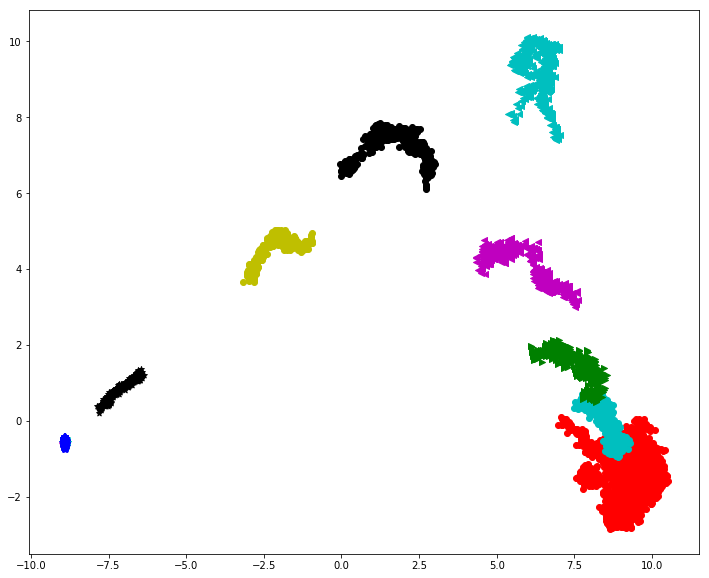

18000


In [27]:
X_new = pca.transform(data)
plt.scatter(X_new[0:6500, 0],    X_new[0:6500, 1],c = 'r', marker='o')
plt.scatter(X_new[6500:7000, 0],    X_new[6500:7000, 1],c = 'c', marker='o')
plt.scatter(X_new[7000:7500, 0], X_new[7000:7500, 1], c='g', marker='>')
plt.scatter(X_new[7500:8000, 0], X_new[7500:8000, 1],c='m', marker='<')
plt.scatter(X_new[8000:8500, 0], X_new[8000:8500, 1],c='c', marker='<')
plt.scatter(X_new[8500:9000, 0], X_new[8500:9000, 1],c='k', marker='o')
plt.scatter(X_new[9000:9500, 0], X_new[9000:9500, 1],c='y', marker='o')
plt.scatter(X_new[9500:10000, 0], X_new[9500:10000, 1],c='k', marker='*')
plt.scatter(X_new[10000:10500, 0], X_new[10000:10500, 1],c='c', marker='*')
plt.scatter(X_new[10500:11000, 0], X_new[10500:11000, 1],c='m', marker='*')
plt.scatter(X_new[11000:, 0], X_new[11000:, 1],c='b', marker='*')
plt.show()
print(X_new.shape[0])

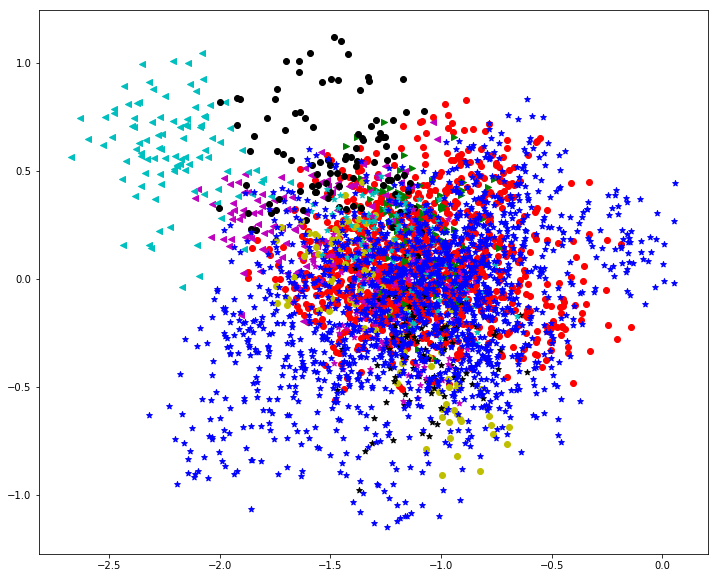

18000


In [24]:
X_new = pca.transform(data)
plt.scatter(X_new[0:1100, 1], X_new[0:1100, 2],c = 'r', marker='o')
plt.scatter(X_new[1100:1200, 1], X_new[1100:1200, 2], c='g', marker='>')
plt.scatter(X_new[1200:1300, 1], X_new[1200:1300, 2],c='m', marker='<')
plt.scatter(X_new[1300:1400, 1], X_new[1300:1400, 2],c='c', marker='<')
plt.scatter(X_new[1400:1500, 1], X_new[1400:1500, 2],c='k', marker='o')
plt.scatter(X_new[1500:1600, 1], X_new[1500:1600, 2],c='y', marker='o')
plt.scatter(X_new[1600:1700, 1], X_new[1600:1700, 2],c='k', marker='*')
plt.scatter(X_new[1700:1800, 1], X_new[1700:1800, 2],c='c', marker='*')
plt.scatter(X_new[1800:1900, 1], X_new[1800:1900, 2],c='m', marker='*')
plt.scatter(X_new[1900:3500, 1], X_new[1900:3500, 2],c='b', marker='*')
plt.show()
print(X_new.shape[0])

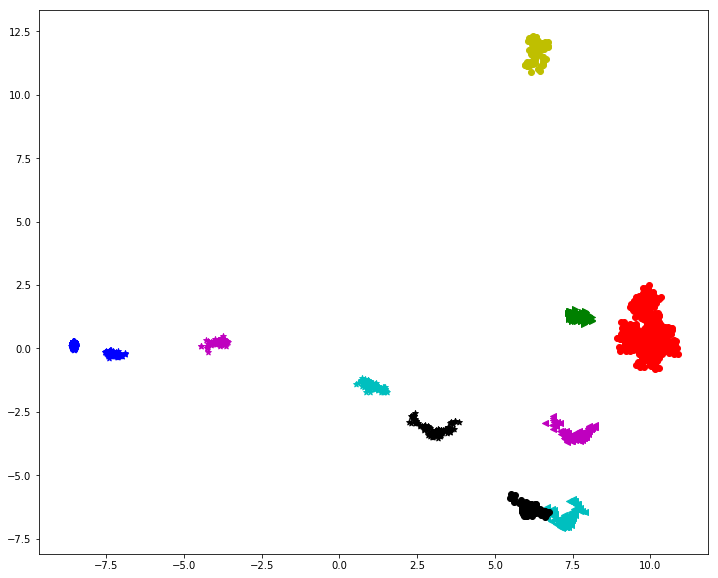

3600


In [32]:
X_new = pca.transform(data)
plt.scatter(X_new[0:1000, 0], X_new[0:1000, 2],c = 'r', marker='o', label="eta < 0.64")
plt.scatter(X_new[1100:1200, 0], X_new[1100:1200, 2], c='g', marker='>')
plt.scatter(X_new[1200:1300, 0], X_new[1200:1300, 2],c='m', marker='<')
plt.scatter(X_new[1300:1400, 0], X_new[1300:1400, 2],c='c', marker='<')
plt.scatter(X_new[1400:1500, 0], X_new[1400:1500, 2],c='k', marker='o')
plt.scatter(X_new[1500:1600, 0], X_new[1500:1600, 2],c='y', marker='o')
plt.scatter(X_new[1600:1700, 0], X_new[1600:1700, 2],c='k', marker='*')
plt.scatter(X_new[1700:1800, 0], X_new[1700:1800, 2],c='c', marker='*')
plt.scatter(X_new[1800:1900, 0], X_new[1800:1900, 2],c='m', marker='*')
plt.scatter(X_new[1900:3500, 0], X_new[1900:3500, 2],c='b', marker='*')
plt.show()
print(X_new.shape[0])

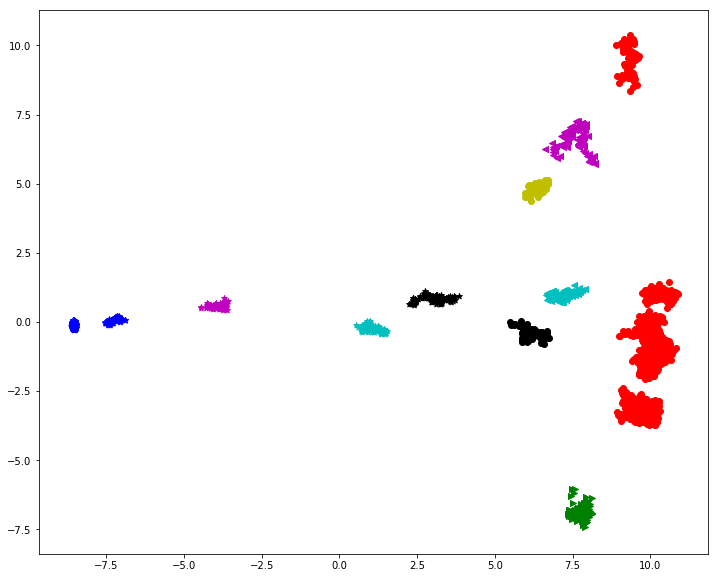

3600


In [33]:
X_new = pca.transform(data)
plt.scatter(X_new[0:1100, 0], X_new[0:1100, 3],c = 'r', marker='o')
plt.scatter(X_new[1100:1200, 0], X_new[1100:1200, 3], c='g', marker='>')
plt.scatter(X_new[1200:1300, 0], X_new[1200:1300, 3],c='m', marker='<')
plt.scatter(X_new[1300:1400, 0], X_new[1300:1400, 3],c='c', marker='<')
plt.scatter(X_new[1400:1500, 0], X_new[1400:1500, 3],c='k', marker='o')
plt.scatter(X_new[1500:1600, 0], X_new[1500:1600, 3],c='y', marker='o')
plt.scatter(X_new[1600:1700, 0], X_new[1600:1700, 3],c='k', marker='*')
plt.scatter(X_new[1700:1800, 0], X_new[1700:1800, 3],c='c', marker='*')
plt.scatter(X_new[1800:1900, 0], X_new[1800:1900, 3],c='m', marker='*')
plt.scatter(X_new[1900:3500, 0], X_new[1900:3500, 3],c='b', marker='*')
plt.show()
print(X_new.shape[0])

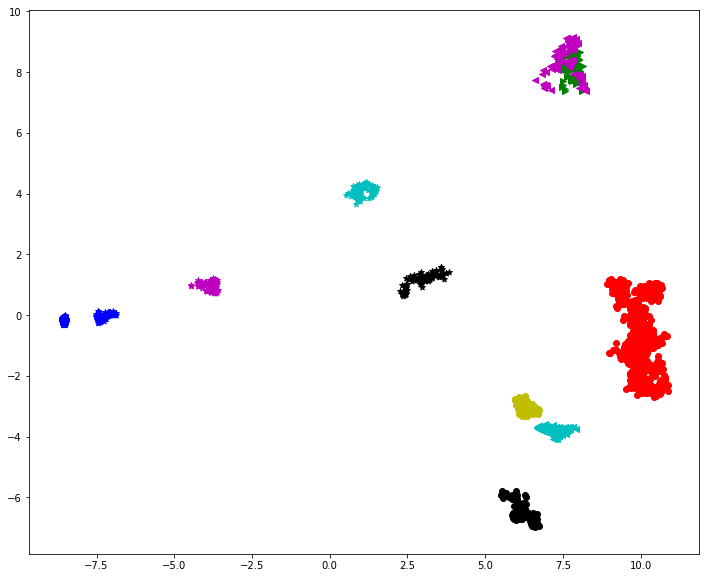

3600


In [34]:
X_new = pca.transform(data)
plt.scatter(X_new[0:1000, 0], X_new[0:1000, 4],c = 'r', marker='o')
plt.scatter(X_new[1100:1200, 0], X_new[1100:1200, 4], c='g', marker='>')
plt.scatter(X_new[1200:1300, 0], X_new[1200:1300, 4],c='m', marker='<')
plt.scatter(X_new[1300:1400, 0], X_new[1300:1400, 4],c='c', marker='<')
plt.scatter(X_new[1400:1500, 0], X_new[1400:1500, 4],c='k', marker='o')
plt.scatter(X_new[1500:1600, 0], X_new[1500:1600, 4],c='y', marker='o')
plt.scatter(X_new[1600:1700, 0], X_new[1600:1700, 4],c='k', marker='*')
plt.scatter(X_new[1700:1800, 0], X_new[1700:1800, 4],c='c', marker='*')
plt.scatter(X_new[1800:1900, 0], X_new[1800:1900, 4],c='m', marker='*')
plt.scatter(X_new[1900:3500, 0], X_new[1900:3500, 4],c='b', marker='*')
plt.show()
print(X_new.shape[0])

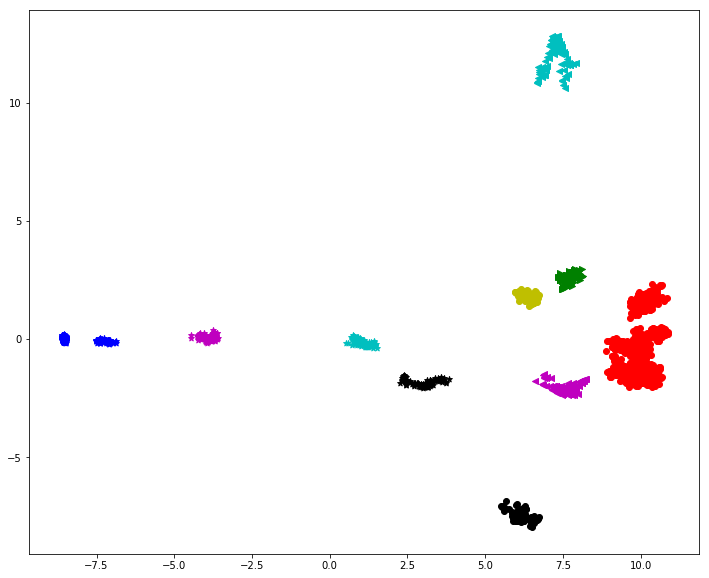

3600


In [35]:
X_new = pca.transform(data)
plt.scatter(X_new[0:1100, 0], X_new[0:1100, 5],c = 'r', marker='o')
plt.scatter(X_new[1100:1200, 0], X_new[1100:1200, 5], c='g', marker='>')
plt.scatter(X_new[1200:1300, 0], X_new[1200:1300, 5],c='m', marker='<')
plt.scatter(X_new[1300:1400, 0], X_new[1300:1400, 5],c='c', marker='<')
plt.scatter(X_new[1400:1500, 0], X_new[1400:1500, 5],c='k', marker='o')
plt.scatter(X_new[1500:1600, 0], X_new[1500:1600, 5],c='y', marker='o')
plt.scatter(X_new[1600:1700, 0], X_new[1600:1700, 5],c='k', marker='*')
plt.scatter(X_new[1700:1800, 0], X_new[1700:1800, 5],c='c', marker='*')
plt.scatter(X_new[1800:1900, 0], X_new[1800:1900, 5],c='m', marker='*')
plt.scatter(X_new[1900:3500, 0], X_new[1900:3500, 5],c='b', marker='*')
plt.show()
print(X_new.shape[0])

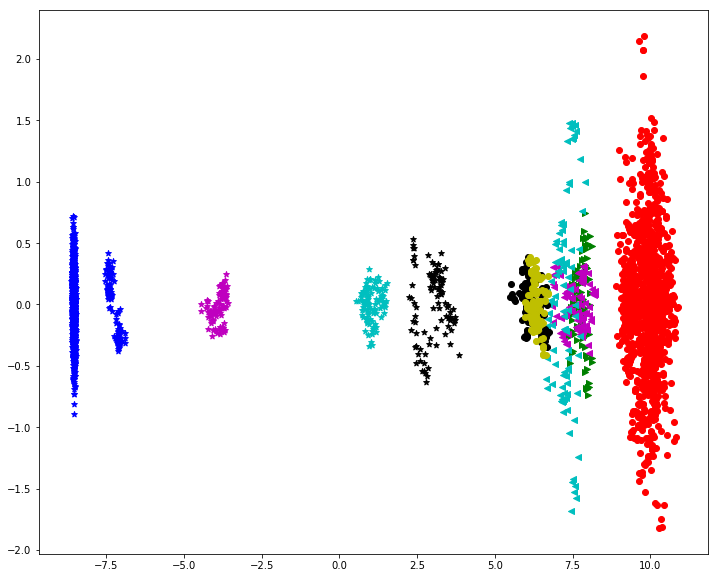

3600


In [36]:
X_new = pca.transform(data)
plt.scatter(X_new[0:1100,    0], X_new[0:1100,    99], c='r', marker='o')
plt.scatter(X_new[1100:1200, 0], X_new[1100:1200, 99], c='g', marker='>')
plt.scatter(X_new[1200:1300, 0], X_new[1200:1300, 99], c='m', marker='<')
plt.scatter(X_new[1300:1400, 0], X_new[1300:1400, 99], c='c', marker='<')
plt.scatter(X_new[1400:1500, 0], X_new[1400:1500, 99], c='k', marker='o')
plt.scatter(X_new[1500:1600, 0], X_new[1500:1600, 99], c='y', marker='o')
plt.scatter(X_new[1600:1700, 0], X_new[1600:1700, 99], c='k', marker='*')
plt.scatter(X_new[1700:1800, 0], X_new[1700:1800, 99], c='c', marker='*')
plt.scatter(X_new[1800:1900, 0], X_new[1800:1900, 99], c='m', marker='*')
plt.scatter(X_new[1900:3500, 0], X_new[1900:3500, 99], c='b', marker='*')
plt.show()
print(X_new.shape[0])

In [37]:
X_new = pca.transform(data)
np.savetxt(r'PCAres/pcaX.txt', X_new[:, 0:5], fmt='%.8f')

In [38]:
np.savetxt(r'PCAres/labels.txt', packf, fmt='%.8f')

In [39]:
p1 = np.mean(np.reshape(X_new[:, 0],(36, 100)), axis=1)
pc = np.mean(np.reshape(packf,(36, 100)), axis=1)
np.savetxt(r'PCAres/p1.txt', p1, fmt='%.8f')
np.savetxt(r'PCAres/label1.txt', pc, fmt='%.8f')

In [40]:
p2 = np.mean(np.reshape(X_new[:, 1],(36, 100)), axis=1)
pc = np.mean(np.reshape(packf,(36, 100)), axis=1)
np.savetxt(r'PCAres/p2.txt', p2, fmt='%.8f')
np.savetxt(r'PCAres/label2.txt', pc, fmt='%.8f')

In [41]:
p3 = np.mean(np.reshape(X_new[:, 3],(36, 100)), axis=1)
pc = np.mean(np.reshape(packf,(36, 100)), axis=1)
np.savetxt(r'PCAres/p4.txt', p3, fmt='%.8f')
np.savetxt(r'PCAres/label.txt', pc, fmt='%.8f')

In [22]:
p1sd = np.std(np.reshape(X_new[:, 1],(36, 100)), axis=1)
pcsd = np.std(np.reshape(packf,(36, 100)), axis=1)
np.savetxt(r'PCAres/p1std.txt', p1sd, fmt='%.8f')
np.savetxt(r'PCAres/label1std.txt', pcsd, fmt='%.8f')

In [23]:
p2sd = np.std(np.reshape(X_new[:, 1],(36, 100)), axis=1)
pcsd = np.std(np.reshape(packf,(36, 100)), axis=1)
np.savetxt(r'PCAres/p2sd.txt', p2sd, fmt='%.8f')
np.savetxt(r'PCAres/label2std.txt', pc, fmt='%.8f')

In [24]:
print([pc, p3])

[array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88]), array([ -1.69912521,  -1.16655744,  -0.311982  ,  -1.09636563,
        -0.80701925,  -0.98758712,  -1.63087001,  -0.57290699,
        -3.2534409 ,  -2.56800508,   5.19857986,  -2.68963297,
        12.51276581,   4.13332007, -12.05860483,   2.11479879,
         4.69671954,   2.67185723,   1.57864884,  -0.0241701 ,
        -0.25394373,  -0.26203295,  -0.25454657,  -0.24682334,
        -0.24826325,  -0.25103509,  -0.261592  ,  -0.25177719,
        -0.24959656,  -0.25389582,  -0.26457896,  -0.25183131,
        -0.24449214,  -0.24382189,  -0.25603455,  -0.24615724])]
